In [204]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from warnings import simplefilter
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [205]:
simplefilter("ignore") 

In [206]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [207]:
covid = pd.read_csv(r'C:\Users\Lenovo\Downloads\us-counties.csv')
covid

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1774199,2021-09-29,USA-69120,Tinian,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00
1774200,2021-09-29,USA-69110,Saipan,Northern Mariana Islands,0,0.43,0.89,0,0.00,0.00
1774201,2021-09-29,USA-78030,St. Thomas,Virgin Islands,7,5.00,9.68,1,0.14,0.28
1774202,2021-09-29,USA-78020,St. John,Virgin Islands,0,0.86,20.55,0,0.00,0.00


In [208]:
covid.drop(columns=['geoid','county', 'state', 'cases', 'cases_avg', 'deaths', 'deaths_avg', 'deaths_avg_per_100k'],axis=1,inplace=True)

In [209]:
covid["date"] = pd.to_datetime(covid["date"])

In [210]:
covid = covid.set_index('date').to_period('D')

In [211]:
covid

,cases_avg_per_100k
date,
2020-01-21,0.02
2020-01-22,0.02
2020-01-23,0.02
2020-01-24,0.02
2020-01-24,0.00
...,...
2021-09-29,0.00
2021-09-29,0.89
2021-09-29,9.68


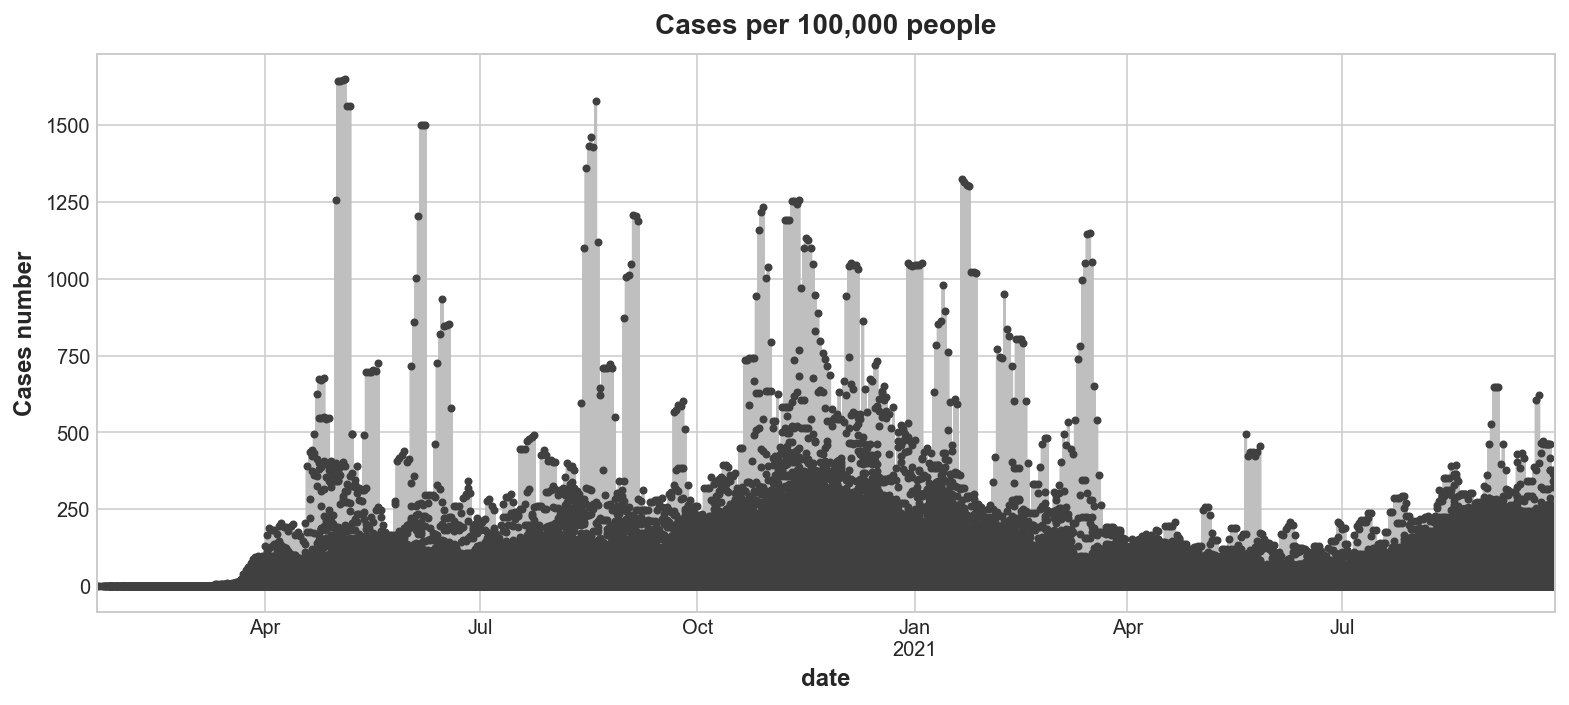

In [219]:
ax = covid.plot(**plot_params)
ax.set(title="Cases per 100,000 people", ylabel="Cases number");

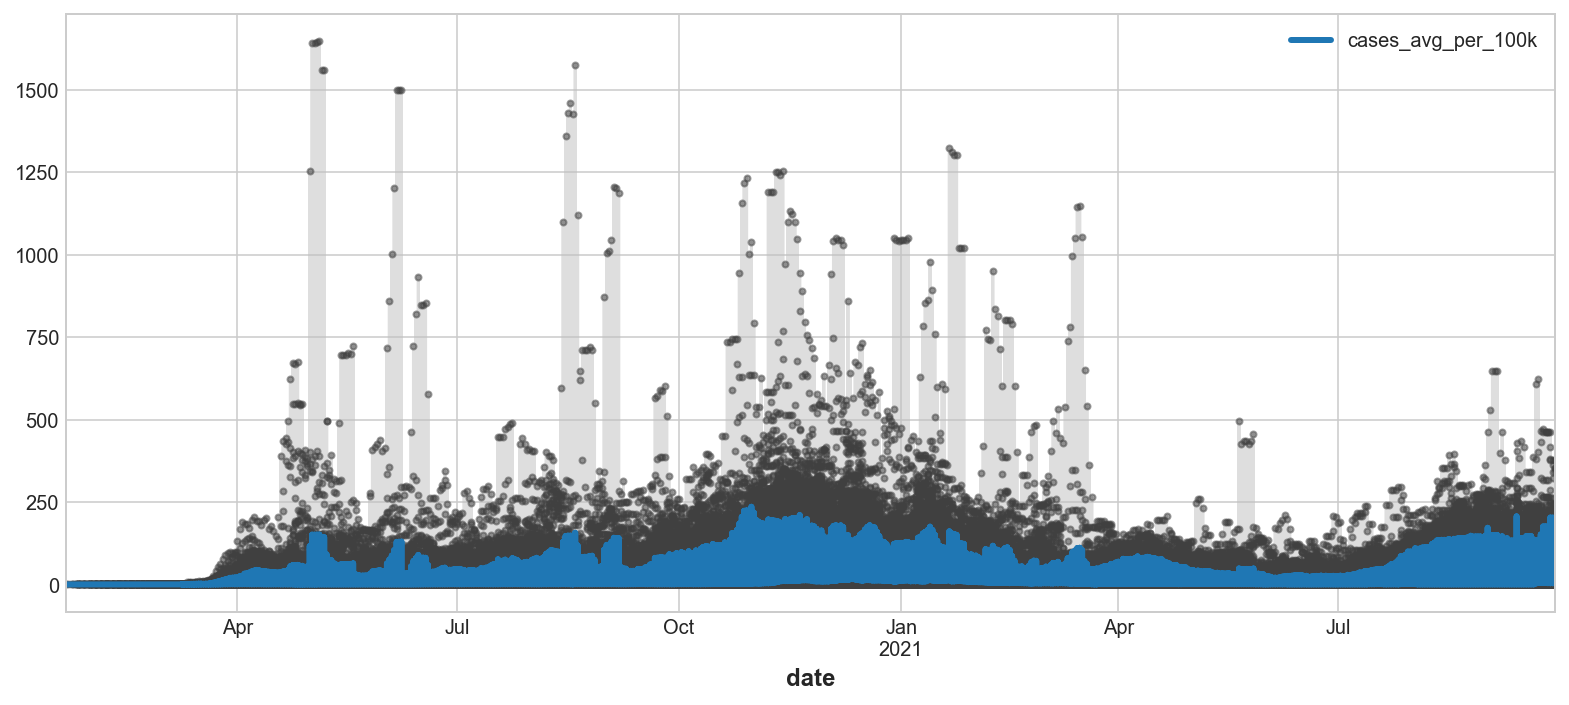

In [213]:
trend = covid.rolling(
    window=12,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=6,  # choose about half the window size
).mean()         

# Check your answer

# Make a plot
ax = covid.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

In [214]:
average_сases = covid.groupby('date').mean()['cases_avg_per_100k']

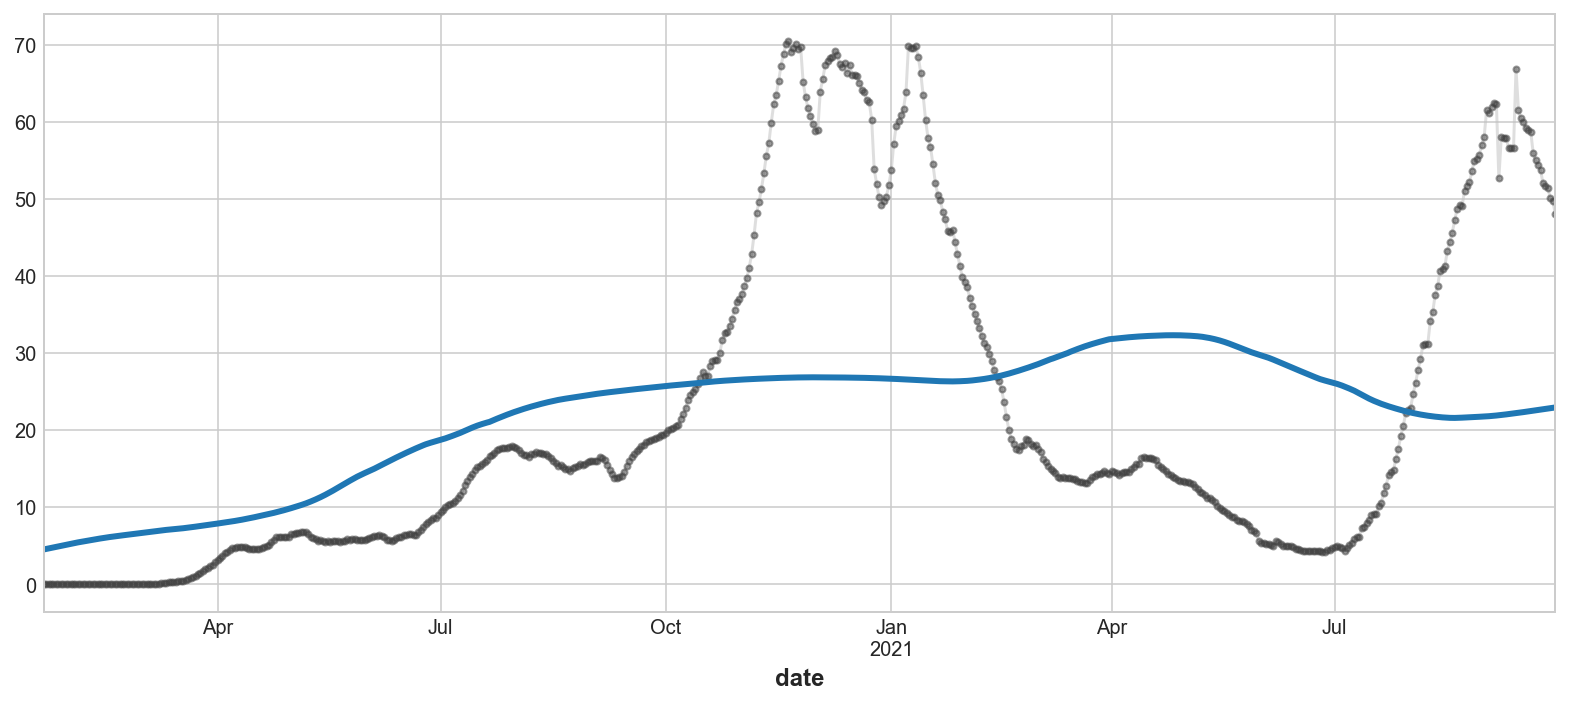

In [215]:
trend = average_сases.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = average_сases.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

In [216]:
from statsmodels.tsa.deterministic import DeterministicProcess

In [217]:
y = average_сases.copy()  
dp = DeterministicProcess(
    index=y.index, 
    order=3,               
)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)

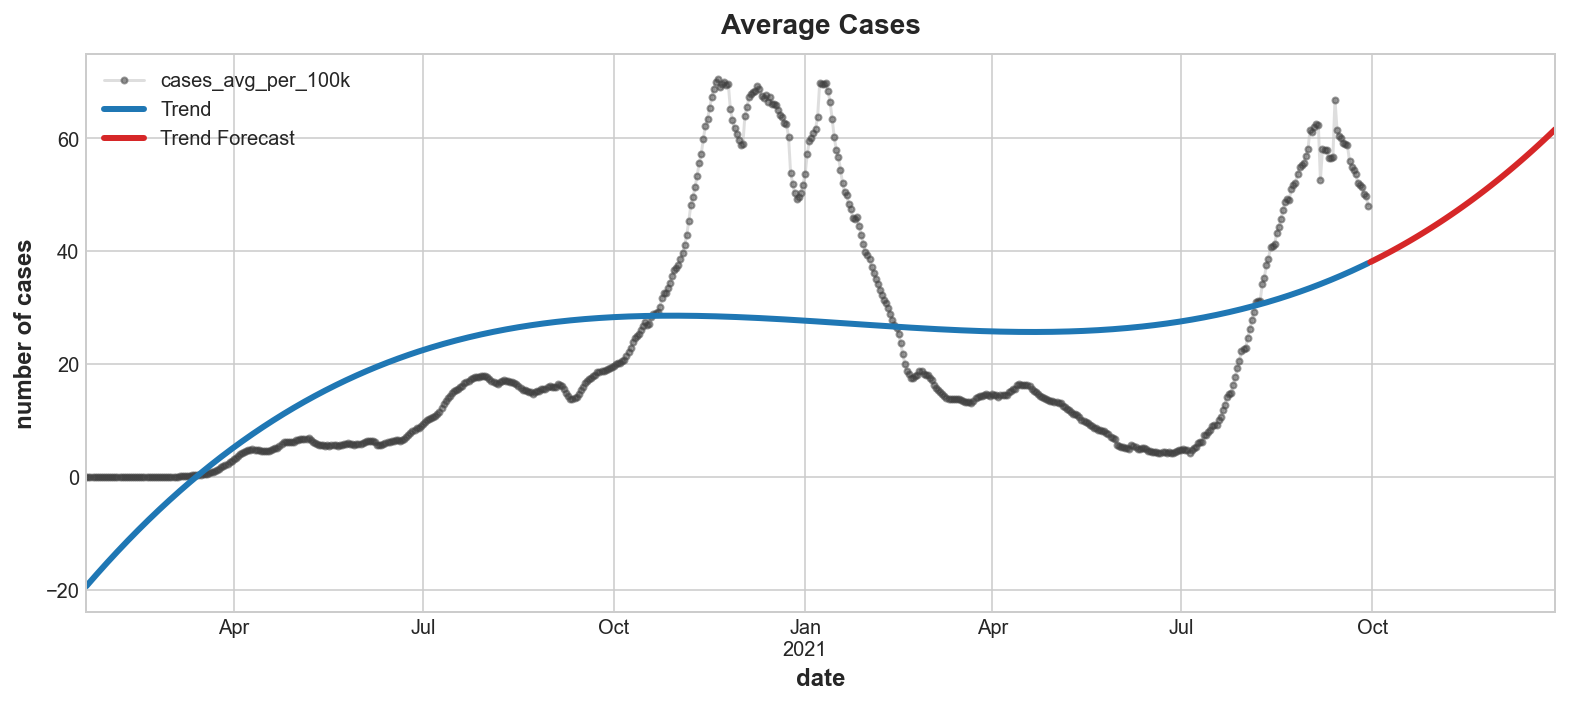

In [220]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Cases", ylabel="number of cases")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

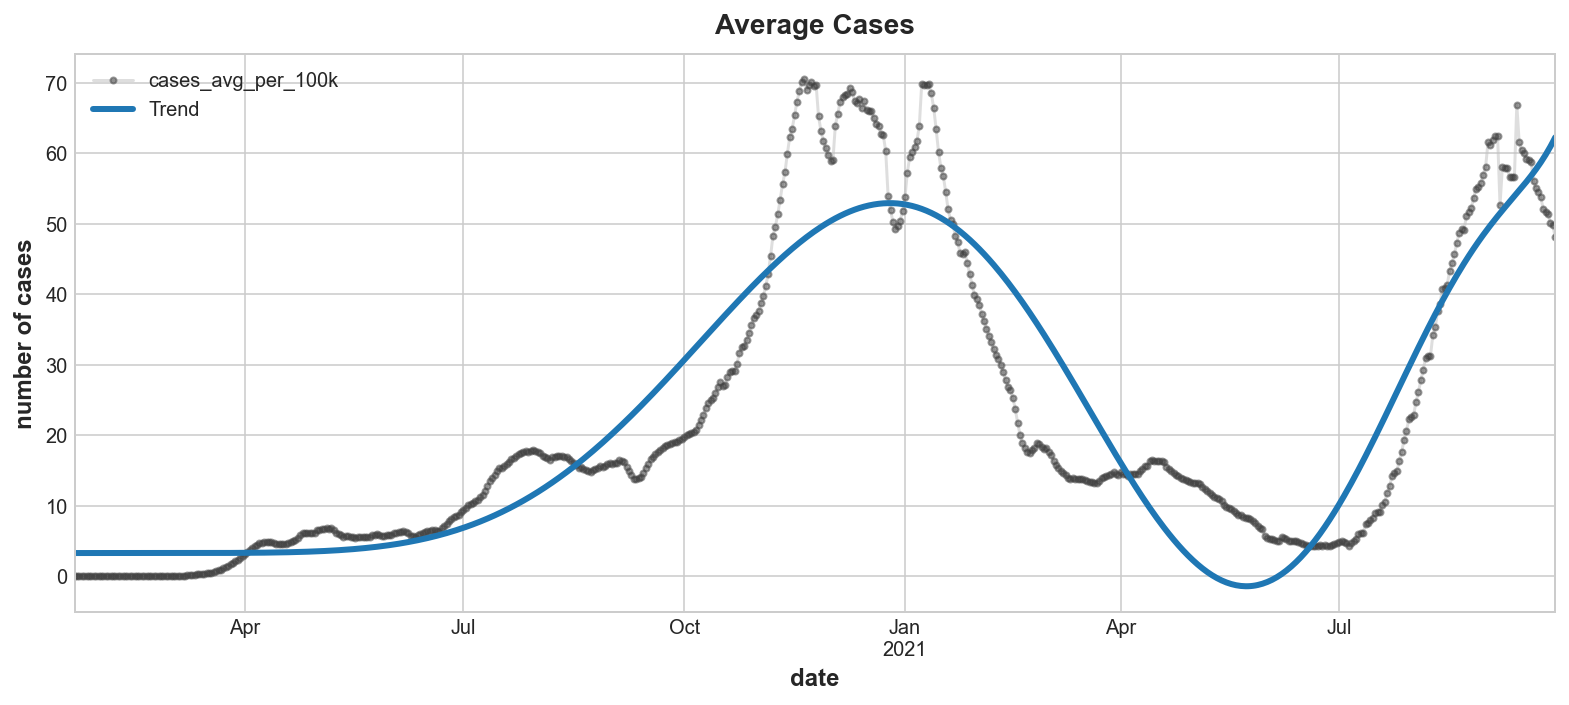

In [221]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=y.index, order=11)
X = dp.in_sample()

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Cases", ylabel="number of cases")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax.legend();

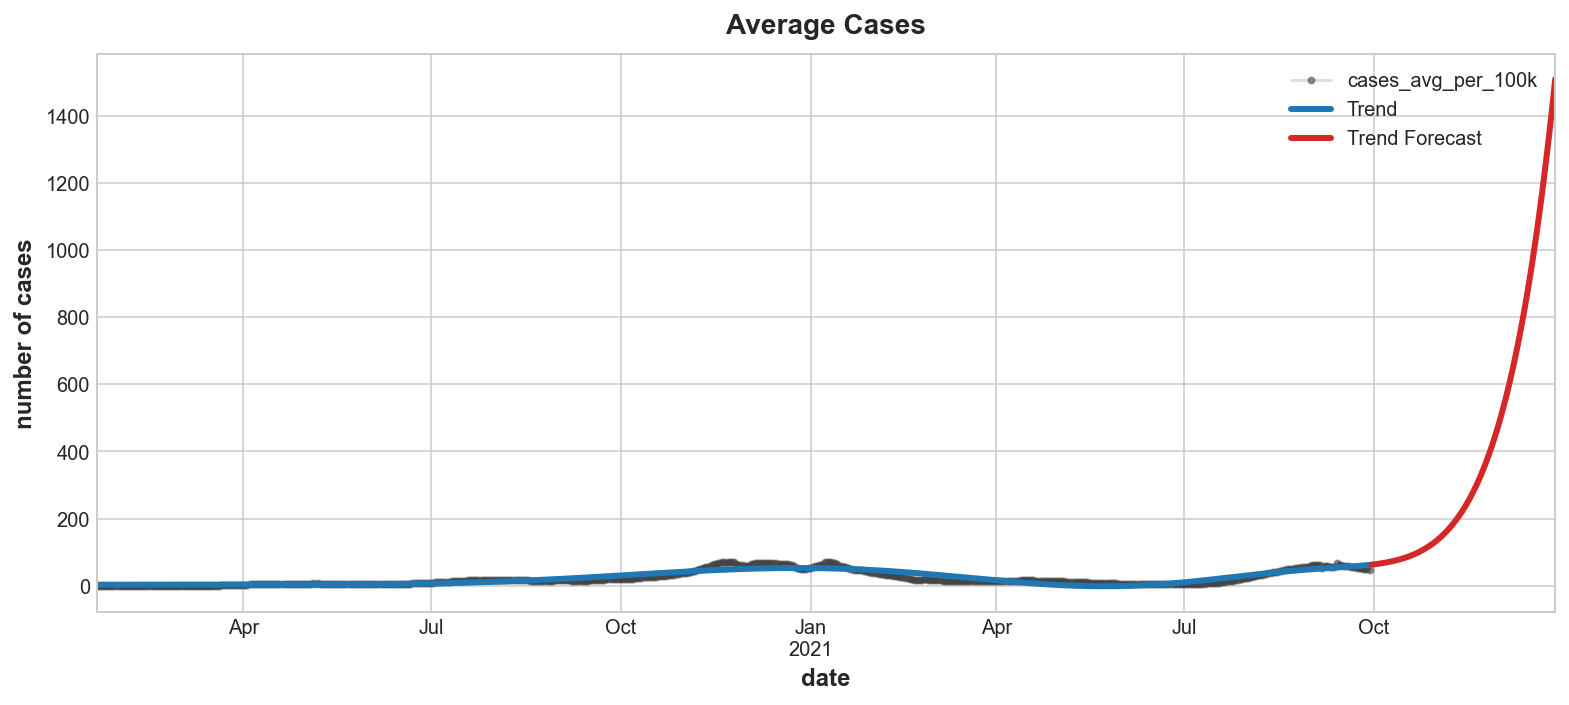

In [222]:
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Cases", ylabel="number of cases")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();